# (Fordgobike-trip data Exploration)
## by (Amr Seleem)

## Preliminary Wrangling

> This analysis investigate a dataset containing info about a bike rental system data company called "Ford GoBike" . The dataset  contain features about individual rides made in a bike-sharing system covering the greater SanFrancisco Bay area, in U.S. There are about 15 features in this dataset such as user, bike ID, gender, birth year, start and end times, start and end stations, and trip duration. 


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns
%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
df = pd.read_csv("Fordgobike-tripdata.csv")
df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
75925,105,2019-02-19 08:49:53.9540,2019-02-19 08:51:39.9030,246.0,Berkeley Civic Center,37.869060,-122.270556,238.0,MLK Jr Way at University Ave,37.871719,-122.273068,6421,Subscriber,1985.0,Male,No
110475,292,2019-02-12 17:59:24.3100,2019-02-12 18:04:17.0350,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,102.0,Irwin St at 8th St,37.766883,-122.399579,3004,Subscriber,1981.0,Male,No
175773,721,2019-02-02 13:22:23.7980,2019-02-02 13:34:25.3790,377.0,Fell St at Stanyan St,37.771917,-122.453704,86.0,Market St at Dolores St,37.769305,-122.426826,1161,Subscriber,1993.0,Female,No
151231,266,2019-02-06 17:30:14.5710,2019-02-06 17:34:41.4630,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,337.0,Webster St at 19th St,37.806970,-122.266588,3522,Subscriber,1994.0,Male,No
88606,392,2019-02-16 17:53:02.2070,2019-02-16 17:59:35.1740,134.0,Valencia St at 24th St,37.752428,-122.420628,223.0,16th St Mission BART Station 2,37.764765,-122.420091,5506,Subscriber,2000.0,Female,No


In [3]:
df.shape

(183412, 16)

In [4]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
#we need to check duplicates
df.duplicated().sum()

0

In [7]:
#Lets remove the unncessary columns 
df.drop(["start_station_longitude", "start_station_latitude", "end_station_longitude", "end_station_latitude", "start_station_id", "end_station_id"], axis =1, inplace =True)
df.sample(5)

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
177692,234,2019-02-01 19:36:18.0380,2019-02-01 19:40:12.8670,16th St Mission BART Station 2,Valencia St at 21st St,4737,Subscriber,1986.0,Male,No
145740,1025,2019-02-07 09:09:17.7130,2019-02-07 09:26:22.9850,Mission Bay Kids Park,S Van Ness Ave at Market St,2366,Subscriber,1990.0,Female,No
61133,445,2019-02-20 17:57:46.8190,2019-02-20 18:05:12.7670,Bancroft Way at College Ave,Berkeley Civic Center,5786,Subscriber,1996.0,Female,No
86193,546,2019-02-17 13:22:23.4910,2019-02-17 13:31:30.1160,Market St at 10th St,Powell St BART Station (Market St at 4th St),4952,Subscriber,1994.0,Male,No
121844,424,2019-02-11 13:47:52.8120,2019-02-11 13:54:57.1600,Pierce Ave at Market St,San Salvador St at 9th St,1068,Subscriber,1993.0,Male,Yes


In [8]:
#we want to see what types of gender are available. 
df.member_gender.nunique()

3

### What is the structure of your dataset?

> There are about 183,412 rows and 15 features. Most important features are user type, gender, birth data, start and end stations, duration. Most of features are numerical. 

### What is/are the main feature(s) of interest in your dataset?

> I am interested in finding insights on trips times, trips duration vs gender, and duration vs age. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The most valuable features are gender, birth, duration, start and end times. 

## Univariate Exploration

> In this section, we investigate distributions of individual variables and take a deeper look to clean things up
and prepare  to look at relationships between variables.

### The Average of trips duration in seconds

Text(0, 0.5, 'Bike Trips')

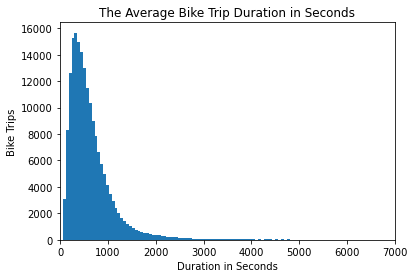

In [9]:
# we begin with the histogram for the bike trip average in seconds
bins = np.arange(0, df["duration_sec"].max() + 60 , 60)

plt.hist(data =df , x = "duration_sec" , bins = bins);

plt.xlim(0,7000);
plt.title("The Average Bike Trip Duration in Seconds");
plt.xlabel("Duration in Seconds");
plt.ylabel("Bike Trips")

> It is found that about 15000 bike trips have an average of 500-600 seconds. For a better understaindg of the graph, it would be meaningful to transform the time from seconds to minutes. 

### The Average of trips duration in minutes

In [10]:
### lets begin with figuring out the average bike trips duration in minutes but we need to convert duratoin_sec to minures
df["duration_min"] = df["duration_sec"]/60


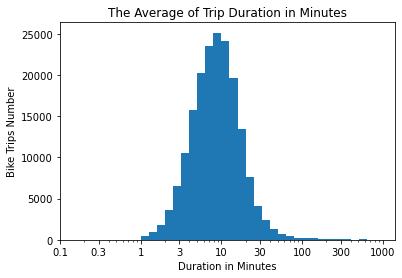

In [11]:
#lets plot the average bike trips duration in minutes 

binedges = 10**np.arange(0 , 3 + 0.1 , 0.1)
ticks =  [ 0.1 , 0.3, 1, 3, 10, 30, 100, 300, 1000]
labels = ["{}".format(v) for v in ticks]

plt.hist(data=df, x="duration_min", bins=binedges);

plt.title("The Average of Trip Duration in Minutes");
plt.xlabel("Duration in Minutes");
plt.ylabel("Bike Trips Number");

plt.xscale("log");
plt.xticks(ticks,labels);

> As we can conclude from this graph, that most of trips are happening between 3 and 10 minutes. 

Since I am very keen to associate all my analysis around duration trip, I want to see how this later change all over the year. So we need to craete a month column. This cane be done from the start_ime

### The User Type Counts

##### Also, It would be insightful to look at the user type

Text(0.5, 0, 'User Type')

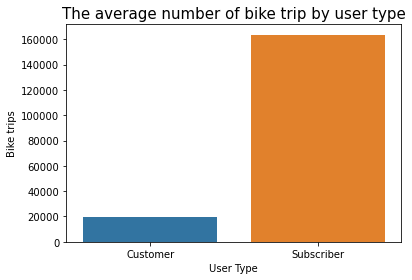

In [12]:
# the following code shows the two types of user type
sb.countplot(data=df, x = "user_type")
plt.title("The average number of bike trip by user type", fontsize=15);
plt.ylabel("Bike trips")
plt.xlabel("User Type")

> It is seen that the most of trips are done by subscribers, which is almost 8 times higher than customers. 

### Gender Counts

#in the following, `we wanted to see how the Gender is affected by number of bike trips

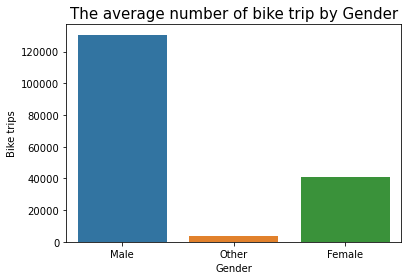

In [13]:
# this code is to show the types in gender 
sb.countplot(data=df, x="member_gender")
plt.title("The average number of bike trip by Gender", fontsize=15);
plt.ylabel("Bike trips")
plt.xlabel("Gender");

> It is found that Male  number is sharing the bikes almost 3 times higher than the Female.

### Age Variations

In [14]:
# we need to establish ages
df["age"] = df["member_birth_year"].apply(lambda x: 2019 - x)

In [15]:
df.age.describe()

count    175147.000000
mean         34.193563
std          10.116689
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: age, dtype: float64

In [16]:
df.age.value_counts()

31.0     10236
26.0      9325
30.0      8972
29.0      8658
28.0      8498
         ...  
89.0         1
92.0         1
91.0         1
109.0        1
141.0        1
Name: age, Length: 75, dtype: int64

> It is seen that there are some outliers that are older than 100. They wont adversely affect the analysis.

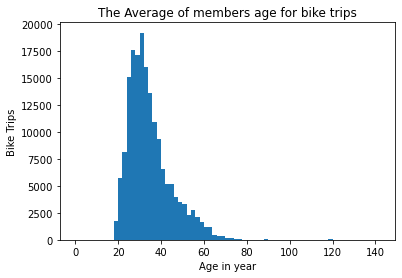

In [17]:
# in this part, we try to show the age variation with respect to the bike trips durations
binsize = np.arange(0, df["age"].max()+ 2 , 2)

plt.hist(data=df, x="age", bins=binsize)

plt.title("The Average of members age for bike trips")
plt.xlabel("Age in year")
plt.ylabel("Bike Trips");

> As seen, the average age of most riders is between 30 and 35.

### Days variation

In [18]:
# here we  want to add a new column with days so we can look at relations all over the month of February
df ["day"] = pd.DatetimeIndex(df["start_time"]).day
df.sample(5)

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,age,day
99980,546,2019-02-14 18:49:58.3390,2019-02-14 18:59:04.7870,Lake Merritt BART Station,Bay Pl at Vernon St,1284,Subscriber,1986.0,Other,No,9.100000,33.0,14
42453,88,2019-02-22 17:38:57.2570,2019-02-22 17:40:25.7280,Paseo De San Antonio at 2nd St,Paseo De San Antonio at 2nd St,3809,Subscriber,1994.0,Male,Yes,1.466667,25.0,22
139304,2326,2019-02-07 21:06:18.9790,2019-02-07 21:45:05.7050,Jersey St at Castro St,Broadway at Kearny,4799,Subscriber,1991.0,Female,No,38.766667,28.0,7
18776,344,2019-02-26 18:01:01.3490,2019-02-26 18:06:45.7910,2nd St at Townsend St,Montgomery St BART Station (Market St at 2nd St),5319,Subscriber,1970.0,Male,No,5.733333,49.0,26
47417,779,2019-02-22 08:43:08.1360,2019-02-22 08:56:07.3960,Hyde St at Post St,8th St at Brannan St,6188,Subscriber,1979.0,Male,No,12.983333,40.0,22


##### In this data, I tried to look up for  https://github.com/BetaNYC/Bike-Share-Data-Best-Practices/wiki/Bike-Share-Data-Systems but it does not work for me. It would have been great to complete the data for the rest of the year so we can look at the variation of trip durations all over the year/seasons. Given that available data, I am interested to see the behavior of users all over the month days. 

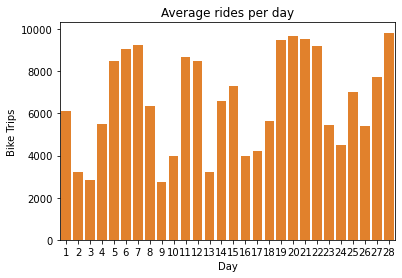

In [19]:
# all bike trips can be shown along the days of the month
sb.countplot(data=df,x='day', color=sb.color_palette()[1])
plt.title("Average rides per day")
plt.xlabel("Day")
plt.ylabel("Bike Trips");

> It is found that in February 2019, most of trips happen in Tuesday, Wednesday and Thursday. Except 28 Feb, it was friday. This montly data is not really consistent but if we have more data of other months, then it might  provide more accurate data.      

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The features of trip duration, age, gender, days and useer type were interesting to check. I have looked at them all and seen how they change over the average of bike trips.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of       data? If so, why did you do this?

> I analyzed the bike trips durations in seconds. But the result was not meaningful. So we have convereted the duration to minutes to have a better understanding of the bike ride duration averagte. Then I have looked at the gender, and age of members with respect to the bike trips. Then I wanted to look at the variation of bike trips with resprect to the days of the month. It was also insightful to know what days have the highest number of rides. 

## Bivariate Exploration

> In this section, we investigate relationships between pairs of variables in your
data. 

### Trip duration vs days
##### Lets get started with the duration for each day

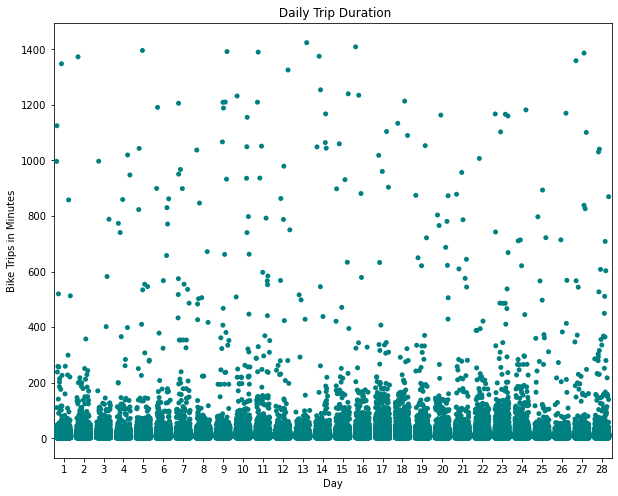

In [27]:
# We try here to show the variations of trip duration vs days
plt.figure(figsize = [10,8])


sb.stripplot(data= df, x="day", y= "duration_min", jitter =0.35, color ="teal")

plt.title(" Daily Trip Duration");
plt.xlabel("Day");
plt.ylabel("Bike Trips in Minutes");

> There was a certain number of number of minutes, 100 minutes, that almost every day in the month. 

Now, we can show the top starting stations duration vs bike trips 

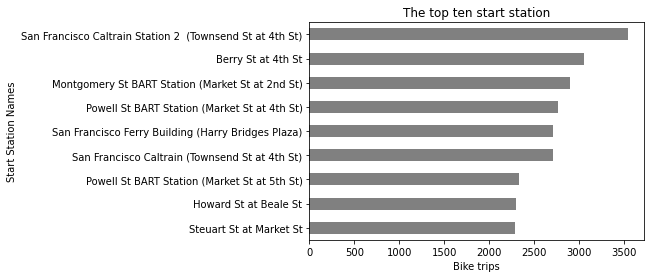

In [21]:
# we want here to show the bike trips in relation  with top starting stations duration. 
top_start_stations = df.start_station_name.value_counts()[1:10].sort_values()

top_start_stations.plot(kind = "barh", color="gray")


plt.title("The top ten start station")
plt.xlabel("Bike trips")
plt.ylabel("Start Station Names");


#####  It is found that san Francisco station 2 is the most starting startion with an estimate of 3500 trips. Coming before berry st and montogomery statrion. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Clarifing the relation between the bike trips duration with days and also with top starting stations have been conducted. We have looked up what are the starting stations change with bike trips. Also, relation between bike trips and days of the months is investigated. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Yes, I observed the relation between the hours and number of duration. Also, the days and the age. Additionally, other corelated features like age and hours. Gender and starting station. 

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### The relation of usertype, gender, and bike trip duration

In [22]:
import seaborn as sns

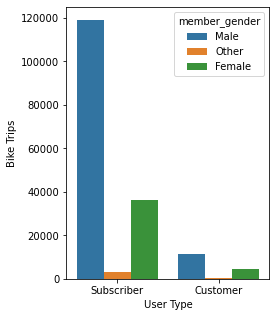

In [23]:
#here we show the user type, including the gender vs. bike trips duration
plt.figure(figsize =[8, 5])
plt.subplot(1, 2, 1)

g = sns.countplot(data=df, x="user_type", hue="member_gender", order=df.user_type.value_counts().index)

g.set_xlabel("User Type")
g.set_ylabel("Bike Trips");

> It is obvious that males use the bike much more thant femals and others. The ration between males vs female is big in the subscriber mode, in comparison with the same raiton but with the customer mode.  

### Daily usage of the bike share per user type and gender

<Figure size 1080x1080 with 0 Axes>

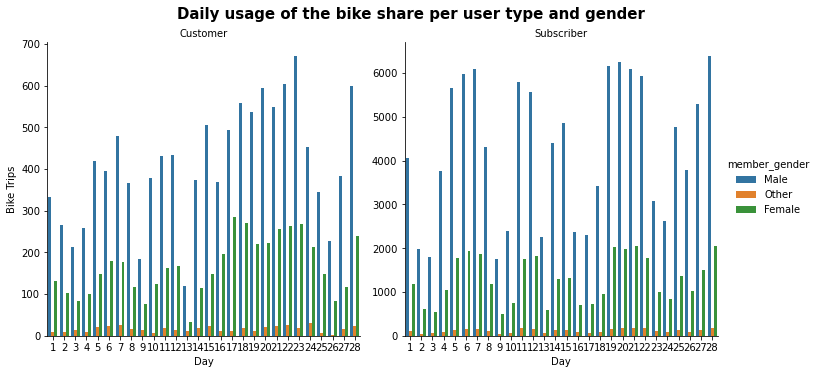

In [24]:
# Here it is interestign to compare the user type, including the gender during the entire month. 
plt.figure(figsize =[15, 15])

g = sns.catplot(data=df, x="day", col="user_type", hue="member_gender", kind="count", sharey = False)

g.set_axis_labels("Day", "Bike Trips")
g._legend.set_title("member_gender")
g.set_titles("{col_name}")

g.fig.suptitle("Daily usage of the bike share per user type and gender", y=1.03, fontsize=15, fontweight="semibold");

> The trend is pretty the same for males and females in the subscriber and customer mode for everyy day. The peak of days are the working days: Tuesday, Wednesday, and Thursdays. It is quite unknown why there is no bikes on Mondays as much as other days. The data does not answer such interesting question. It is also found that female use bikes compare to males in the working days. Male use more bikes than females on the weekend. 

## The relationship between the days, bike trips duration and gender

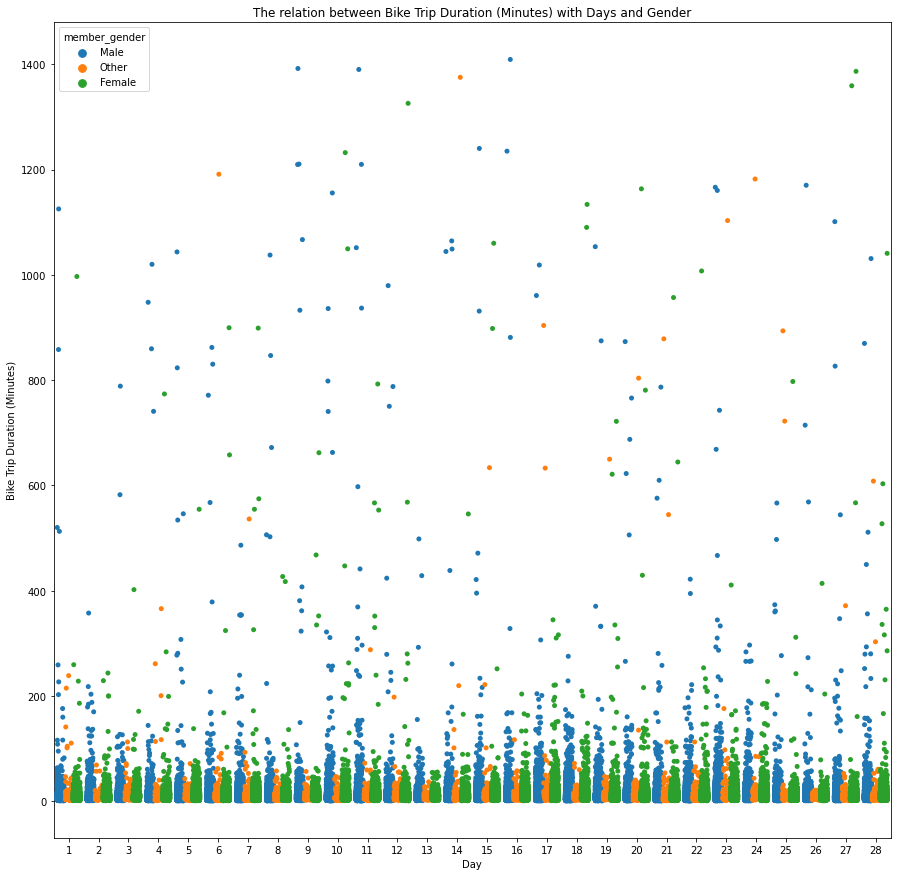

In [28]:
#here we show the relation between Bike Trip Duration (Minutes) with Days and Gender
plt.figure(figsize =[15, 15])

sb.stripplot(data =df, x="day", y="duration_min", hue = 'member_gender', jitter= 0.35, dodge =True)



plt.title("The relation between Bike Trip Duration (Minutes) with Days and Gender")
plt.xlabel("Day")
plt.ylabel("Bike Trip Duration (Minutes)");

> From this scatter, it is clear that number of female users take more short trips than male users. But male users take the longer trips. Also, it is quite surprising that male users take more trips on weekends. 

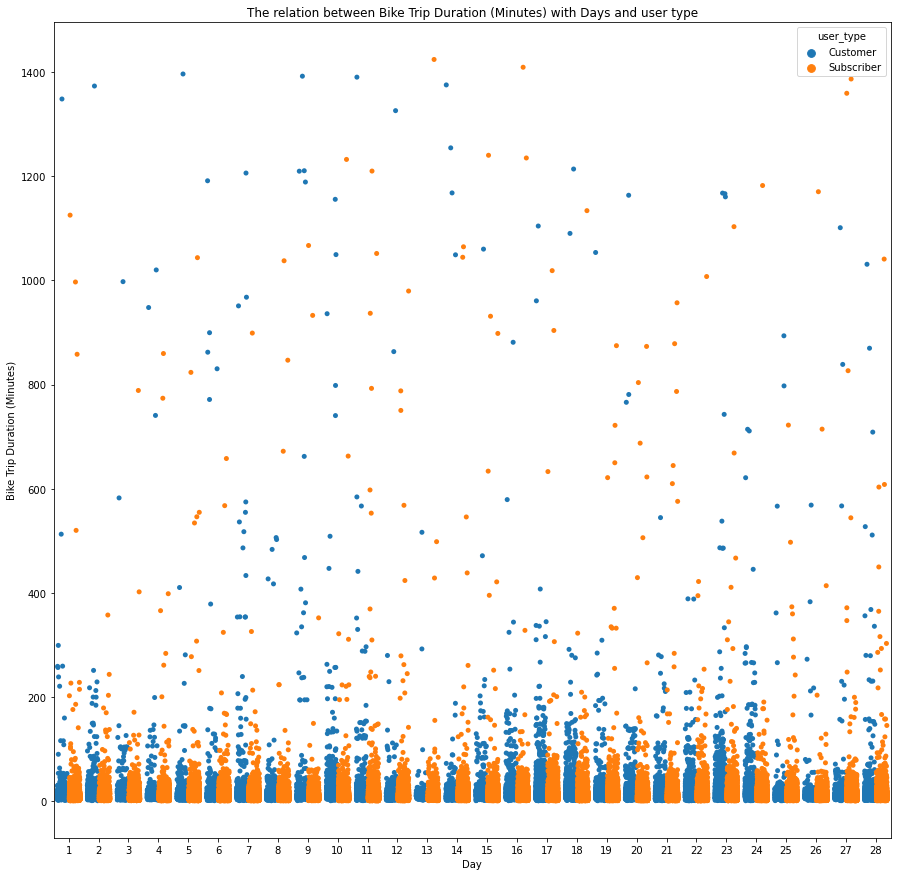

In [29]:
#Finally, we show the relation between Bike Trip Duration (Minutes) with Days and user type
plt.figure(figsize =[15, 15])

sb.stripplot(data =df, x="day", y="duration_min", hue = 'user_type', jitter= 0.35, dodge =True)

plt.title("The relation between Bike Trip Duration (Minutes) with Days and user type")
plt.xlabel("Day")
plt.ylabel("Bike Trip Duration (Minutes)");

 > The relation between customer and subscriber, gender and duration was surprising. From the results, it is found that customer take longer trips, this could be because they are toursist. They are ususally active on weekends. Meanwhile, subscribers are active on short trips, and take part more on working days. 


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> On one side, the relation between female users take more short trips than male users. But male users take the longer trips. Also, it is quite surprising that male users take more trips on weekends. I am really surprised that there are no many trips on Mondays.  On the other side, the relation between customer and subscriber, gender and duration was surprising. From the results, it is found that customer take longer trips, this could be because they are toursist. They are ususally active on weekends. Meanwhile, subscribers are active on short trips, and take part more on working days. 

### Were there any interesting or surprising interactions between features?

> It is interesting to find out that female users take more short trips than male users. But male users take the longer trips. Also, it is quite surprising that male users take more trips on weekends. I am really surprised that there are no many trips on Mondays. That's interesting. Why it is only on three days. I assume that many people take days off on Mondays or users prefer to go using transportation because they are just tired afer weekends. 

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!